In [99]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/mbajk_dataset.csv')

df.head()

,date,temperature,relative_humidity,dew_point,apparent_temperature,precipitation_probability,rain,surface_pressure,bike_stands,available_bike_stands
0,2023-07-30 12:12:58+00:00,24.1,69,18.1,27.5,27.0,0.0,981.3,22,13
1,2023-09-11 20:14:06+00:00,19.2,85,16.6,20.9,0.0,0.0,981.7,22,0
2,2023-07-09 05:12:32+00:00,NaN,92,16.2,19.2,0.0,0.0,989.1,22,8
3,2023-07-21 12:37:13+00:00,NaN,64,17.2,27.2,94.0,0.0,978.8,22,14
4,2023-07-03 17:01:20+00:00,NaN,80,17.3,22.9,NaN,NaN,982.4,22,21


In [100]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour

df['weekend'] = np.where(df['date'].dt.dayofweek > 4, 1, 0)

df.drop('date', axis=1, inplace=True)
df.head()

,temperature,relative_humidity,dew_point,apparent_temperature,precipitation_probability,rain,surface_pressure,bike_stands,available_bike_stands,year,month,day,hour,weekend
0,24.1,69,18.1,27.5,27.0,0.0,981.3,22,13,2023,7,30,12,1
1,19.2,85,16.6,20.9,0.0,0.0,981.7,22,0,2023,9,11,20,0
2,NaN,92,16.2,19.2,0.0,0.0,989.1,22,8,2023,7,9,5,1
3,NaN,64,17.2,27.2,94.0,0.0,978.8,22,14,2023,7,21,12,0
4,NaN,80,17.3,22.9,NaN,NaN,982.4,22,21,2023,7,3,17,0


In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

input_cols = df.columns.tolist()
output_cols = ['temperature', 'precipitation_probability', 'rain']

for col in output_cols:
    input_cols.remove(col)

for target_column in output_cols:
    # Step 1: Select rows with missing values in the target column
    missing_data = df[df[target_column].isnull()]

    # Step 2: Create a copy of the original DataFrame for processing
    df_copy = df.copy()

    # Remove rows with missing values in the target column from the copy
    df_copy.dropna(subset=[target_column], inplace=True)

    # Step 3: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df_copy[input_cols], df_copy[target_column], test_size=0.30)

    # Step 4: Train a Linear Regression model on the training data
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)

    # Step 5: Make predictions for missing values in the target column
    predictions = regression_model.predict(missing_data[input_cols])

    # Step 6: Fill in missing values with predicted values
    df.loc[missing_data.index, target_column] = predictions

In [102]:
from scipy.stats import boxcox

df['temperature'] = df['temperature'] + (abs(df['temperature'].min()) + 1)
df['temperature'], _ = boxcox(df['temperature'])

df['dew_point'] = df['dew_point'] + (abs(df['dew_point'].min()) + 1)
df['dew_point'], _ = boxcox(df['dew_point'])

df['relative_humidity'] = df['relative_humidity'] + (abs(df['relative_humidity'].min()) + 1)
df['relative_humidity'], _ = boxcox(df['relative_humidity'])

df['dew_point'] = df['dew_point'] + (abs(df['dew_point'].min()) + 1)
df['dew_point'], _ = boxcox(df['dew_point'])

df['apparent_temperature'] = df['apparent_temperature'] + (abs(df['apparent_temperature'].min()) + 1)
df['apparent_temperature'], _ = boxcox(df['apparent_temperature'])

df['surface_pressure'], _ = boxcox(df['surface_pressure'])

df['precipitation_probability'] = df['precipitation_probability'] + (abs(df['precipitation_probability'].min()) + 1)
df['precipitation_probability'], _ = boxcox(df['precipitation_probability'])

df['rain'] = df['rain'] + (abs(df['rain'].min()) + 1)
df['rain'], _ = boxcox(np.array(df['rain']))

df['surface_pressure'], _ = boxcox(df['surface_pressure'])



/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/scipy/optimize/_optimize.py:2489: RuntimeWarning: invalid value encountered in scalar multiply
  tmp2 = (x - v) * (fx - fw)
/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/scipy/stats/_morestats.py:935: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/numpy/core/_methods.py:152: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_su

In [103]:
df['apparent_temperature_difference'] = df['temperature'] - df['apparent_temperature']

df["day_time"] = np.where((df["hour"] >= 6) & (df["hour"] <= 18), 1, 0)

In [104]:
df.head()

,temperature,relative_humidity,dew_point,apparent_temperature,precipitation_probability,rain,surface_pressure,bike_stands,available_bike_stands,year,month,day,hour,weekend,apparent_temperature_difference,day_time
0,28.307304,8358.628297,85.845361,40.367161,2.240849,0.184513,0.118034,22,13,2023,7,30,12,1,-12.059857,1
1,22.319656,11589.665591,76.101194,30.741038,2.066239,0.184513,0.118034,22,0,2023,9,11,20,0,-8.421381,0
2,20.128196,13180.925804,73.578699,28.306170,2.066239,0.184513,0.118034,22,8,2023,7,9,5,1,-8.177974,0
3,29.763082,7463.373605,79.945236,39.924138,2.414444,0.184513,0.118034,22,14,2023,7,21,12,0,-10.161056,1
4,24.564541,10519.579472,80.592896,33.630185,2.290567,0.206095,0.118034,22,21,2023,7,3,17,0,-9.065644,1


In [105]:
# from sklearn.preprocessing import MinMaxScaler
# 
# numerical_columns = df.select_dtypes(include='number').columns.tolist()
# 
# minMax = MinMaxScaler()
# df[numerical_columns] = minMax.fit_transform(df[numerical_columns])

In [106]:
# from sklearn.preprocessing import StandardScaler
# 
# normally_distributed = [
#     'temperature',
#     'relative_humidity',
#     'dew_point',
#     'apparent_temperature',
#     'surface_pressure'
# ]
# 
# standardScaler = StandardScaler()
# df[normally_distributed] = standardScaler.fit_transform(df[normally_distributed])

In [107]:
from sklearn.feature_selection import mutual_info_regression

input_cols = df.columns.tolist()
output_col = "available_bike_stands"
input_cols.remove(output_col)

information_gain_scores = mutual_info_regression(df[input_cols], df[output_col])

feature_importances = pd.DataFrame({
    'feature': df[input_cols].columns,
    'information_gain': information_gain_scores
})

feature_scores = feature_importances.sort_values(by='information_gain', ascending=False)

feature_scores.head(10)

,feature,information_gain
13,apparent_temperature_difference,0.835495
3,apparent_temperature,0.306134
0,temperature,0.250961
11,hour,0.193334
2,dew_point,0.184545
4,precipitation_probability,0.166082
14,day_time,0.114922
1,relative_humidity,0.097522
10,day,0.076486
5,rain,0.058679


In [108]:
input_data = feature_scores['feature'].tolist()[:5]
print(input_data)

['apparent_temperature_difference', 'apparent_temperature', 'temperature', 'hour', 'dew_point']


In [109]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = df.select_dtypes(include='number').columns.tolist()

minMax = MinMaxScaler()
df[input_data] = minMax.fit_transform(df[input_data])

In [110]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, \
    BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor, MLPClassifier

regressors = [RandomForestRegressor(random_state=1234), BaggingRegressor(random_state=1234),
              AdaBoostRegressor(random_state=1234), GradientBoostingRegressor(random_state=1234),
              MLPRegressor(random_state=1234)]
classifiers = [BaggingClassifier(random_state=1234), RandomForestClassifier(random_state=1234),
               AdaBoostClassifier(random_state=1234),
               GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=1234),
               MLPClassifier(random_state=1234)]

x = df[input_data]
y = df['available_bike_stands']
k_fold = KFold(n_splits=5, shuffle=True, random_state=1234)

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

results = {regressor.__class__.__name__: {'mea': [], 'mse': [], 'explained_variance': []} for regressor in regressors}

for train_index, test_index in k_fold.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for regressor in regressors:
        reg_name = regressor.__class__.__name__
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        explained_variance = explained_variance_score(y_test, y_pred)

        results[reg_name]['mea'].append(mae)
        results[reg_name]['mse'].append(mse)
        results[reg_name]['explained_variance'].append(explained_variance)

# results to df
results_df = pd.DataFrame.from_dict({(i): results[i]
                                     for i in results.keys()},
                                    orient='index')

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [112]:
avg_reg_results = {}
for model_name, model_scores in results.items():
    print(model_name, ':')
    avg_reg_results[model_name] = {}
    for metric, scores in model_scores.items():
        print(' ', metric, np.mean(scores))
        avg_reg_results[model_name][metric] = np.mean(scores)

RandomForestRegressor :
  mea 1.3944279568974334
  mse 4.421108318983989
  explained_variance 0.9033409627656838
BaggingRegressor :
  mea 1.463126497177108
  mse 4.935401913297504
  explained_variance 0.892099422445607
AdaBoostRegressor :
  mea 4.942447246196623
  mse 33.62942958764912
  explained_variance 0.2686490303277082
GradientBoostingRegressor :
  mea 4.433533128765144
  mse 28.690891852238984
  explained_variance 0.37266412358843476
MLPRegressor :
  mea 4.739629630429463
  mse 32.64623807930759
  explained_variance 0.2870884145145077


In [113]:
avg_maes = {}
avg_mses = {}
avg_evs = {}

for i in avg_reg_results:
    avg_maes[i] = avg_reg_results[i]['mea']
    avg_mses[i] = avg_reg_results[i]['mse']
    avg_evs[i] = avg_reg_results[i]['explained_variance']

print(avg_maes)
print(avg_mses)
print(avg_evs)

{'RandomForestRegressor': 1.3944279568974334, 'BaggingRegressor': 1.463126497177108, 'AdaBoostRegressor': 4.942447246196623, 'GradientBoostingRegressor': 4.433533128765144, 'MLPRegressor': 4.739629630429463}
{'RandomForestRegressor': 4.421108318983989, 'BaggingRegressor': 4.935401913297504, 'AdaBoostRegressor': 33.62942958764912, 'GradientBoostingRegressor': 28.690891852238984, 'MLPRegressor': 32.64623807930759}
{'RandomForestRegressor': 0.9033409627656838, 'BaggingRegressor': 0.892099422445607, 'AdaBoostRegressor': 0.2686490303277082, 'GradientBoostingRegressor': 0.37266412358843476, 'MLPRegressor': 0.2870884145145077}


/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


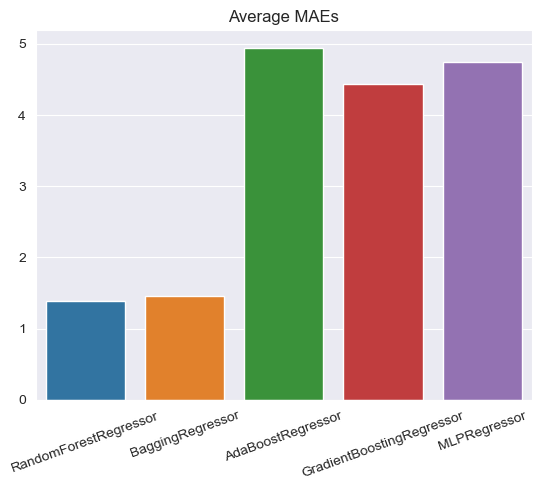

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=list(avg_maes.keys()), y=list(avg_maes.values())).set_title('Average MAEs')
plt.xticks(rotation=20)
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


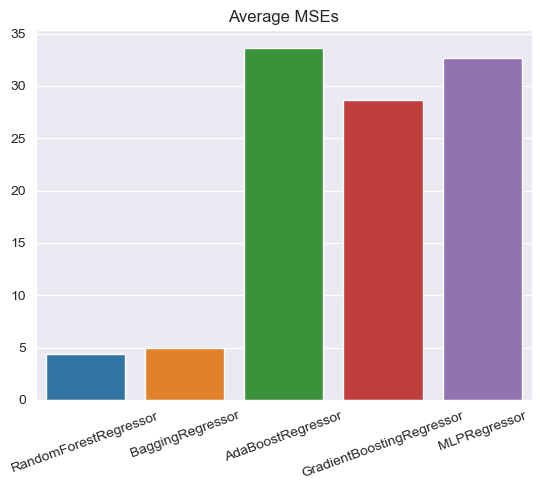

In [115]:
sns.barplot(x=list(avg_mses.keys()), y=list(avg_mses.values())).set_title('Average MSEs')
plt.xticks(rotation=20)
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/rnn/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


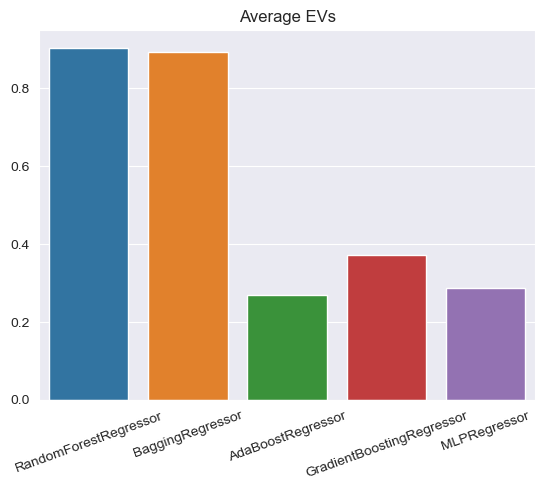

In [116]:
sns.barplot(x=list(avg_evs.keys()), y=list(avg_evs.values())).set_title('Average EVs')
plt.xticks(rotation=20)
plt.show()

In [117]:
import pickle

best_model = regressors[0]

# Save to file in the current working directory
pkl_filename = "models/regressor.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(best_model, file)

# scaler
pkl_filename = "models/scaler.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(minMax, file)